!jt -t chesterish
# !jt -r

In [1]:
from genetic_algorithm import *
from numpy.random import default_rng
from tqdm import tqdm
import copy
%matplotlib notebook

import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation

In [7]:

# ## hexadecimal generator

nr_of_input = 2
nr_of_actions = 5
nr_of_inner = 3
nr_of_genes = 8
nr_individuals = 5000

individuals = generate_initial_genomes_for_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner)

## world size
world_size_x = 120
world_size_y = 120

rng = default_rng()
x = rng.choice(world_size_x, size=nr_individuals, replace=True)
y = rng.choice(world_size_y, size=nr_individuals, replace=True)

# ## initial brain and position generator

result = calculate_individual_output_weights(individuals)

for indiv in result:
    result[indiv]['position'] = [[x[indiv], y[indiv]]]

In [8]:
nr_of_errors = 0

k = 220
n = 0
pbar = tqdm(total=k, initial=n)

while k>n: 
    pbar.update(1)
#     print('n',n)
    for indiv in result:
#         print('indiv', indiv)
        x, y = result[indiv]['position'][-1][0], result[indiv]['position'][-1][1]
        position_list = []
        for out in result[indiv]['out']:
#             if 'out' in out:
            new_pos = move(out, result[indiv]['out'][out])
            position_list.append(new_pos)
        if position_list:
            position_list = list(map(sum, zip(*position_list)))
            position_list = make_smaller_(position_list)
            position_list = list(map(sum, zip(*[[x, y]] + [position_list])))

            position_list[0] = normalize_position_if_outside_world(position_list[0], world_size_x)
            position_list[1] = normalize_position_if_outside_world(position_list[1], world_size_y)
    #         print('norm', position_list)
            result[indiv]['position'].append(position_list)
    ######### if n>=1 proceed with neurons #######        
            if n >= 1:
                apply_input(result, indiv)
            else:
                pass
    
    last_pos_list = {obj:result[obj]['position'][-1] for obj in result}
    prevent_overlap_moevement(last_pos_list)
    
#     last_pos_list = [result[obj]['position'][-1] for obj in result]
    
#     for obj in range(len(last_pos_list)):
#         for i_nr, i in enumerate(last_pos_list[obj+1:], start=obj+1):
#             if last_pos_list[obj] == i:
#                 try:
#                     result[i_nr]['position'][-1] = result[i_nr]['position'][-2]
#                 except IndexError as err:
#                     print('iteration-', n)
#                     print('i_nr-', i_nr)
#                     print(result[i_nr]['position'])
#                     print()

#     last_pos_list = {obj:result[obj]['position'][-1] for obj in result}
#     obj_key = list(last_pos_list.keys())
    
#     for obj_nr, obj in enumerate(obj_key):
#         for i_nr, i in enumerate(obj_key[obj_nr+1]):
#             if last_pos_list[obj] == i:
#                 try:
#                     result[i_nr]['position'][-1] = result[i_nr]['position'][-2]
#                 except IndexError as err:
#                     print('iteration-', n)
#                     print('i_nr-', i_nr)
#                     print(result[i_nr]['position'])
#                     print()
    

    n += 1
pbar.close()


100%|████████████████████████████████████████████████████████████████████████████████| 220/220 [06:19<00:00,  1.72s/it]


generate dictionary of coords 

In [9]:
coords = [{'x':[], 'y':[]} for key in range(len(result[indiv]['position']))]
for indiv in result:
    for pos_nr, pos in enumerate(result[indiv]['position']):
        coords[pos_nr]['x'].append(pos[0])
        coords[pos_nr]['y'].append(pos[1])

visualisation

<IPython.core.display.Javascript object>


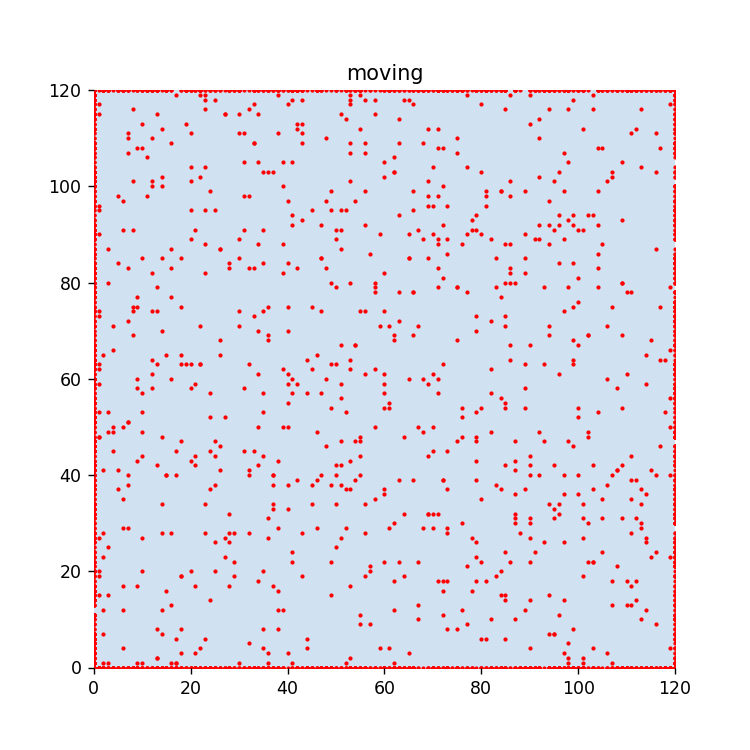

In [11]:
def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Blues(.2))

    ax.set_xlim([0,120])
    ax.set_ylim([0,120])
    ax.set_title('moving')
    ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c='red', s=2, marker='o')
    [spine.set_visible(False) for spine in ax.spines.values()] #remove chart 
    
fig, ax = plt.subplots(figsize=(6,6))
anime = FuncAnimation(
    fig = fig,
    func = update,
    frames = len(coords),
    interval = 10, repeat=False
)


### mutation

hexa to binary

In [6]:
binary = bin(int(individuals[0][0].hex_id, 16))[2:]
if len(binary) < 32:
    factor = 32 - len(binary)
    binary = '0' * factor + binary
binary

'11001000001111110001001111001011'